In [2]:
%load_ext autoreload
%autoreload 2

import my_scripts
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
SEED = 12

In [4]:
X, Y, labels = my_scripts.generation_dataset(1000, SEED)

In [ ]:
pca = sklearn.decomposition.PCA()
X_pca = pca.fit_transform(X)

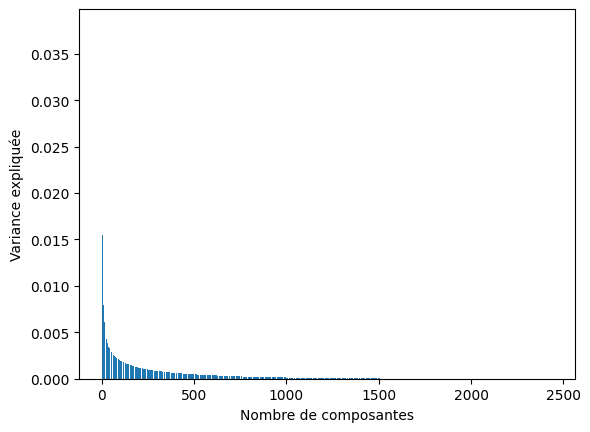

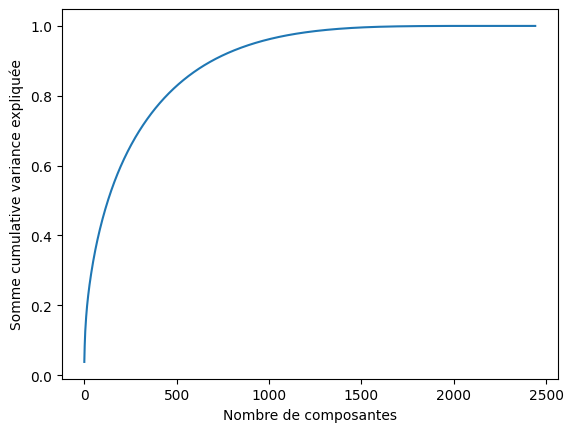

In [ ]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée')
plt.show()
plt.close()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Somme cumulative variance expliquée')
plt.show()
plt.close()

In [ ]:
my_scripts.plot_acp(X_pca, Y, 5, labels)

In [ ]:
K = len(labels)
seuil_acp = 0.8
variance_cum = np.cumsum(pca.explained_variance_ratio_)
D = np.argmax(variance_cum >= seuil_acp) + 1
palette = sns.color_palette("tab10", K)

In [ ]:
kmeans = sklearn.cluster.KMeans(n_clusters=K, random_state=SEED, n_init=10)
kmeans_affectations = kmeans.fit_predict(X_pca[:, :D])
kmeans_compositions = my_scripts.composition_clusters(labels, kmeans_affectations, Y)

my_scripts.plot_composition("kmeans", labels, kmeans_compositions)

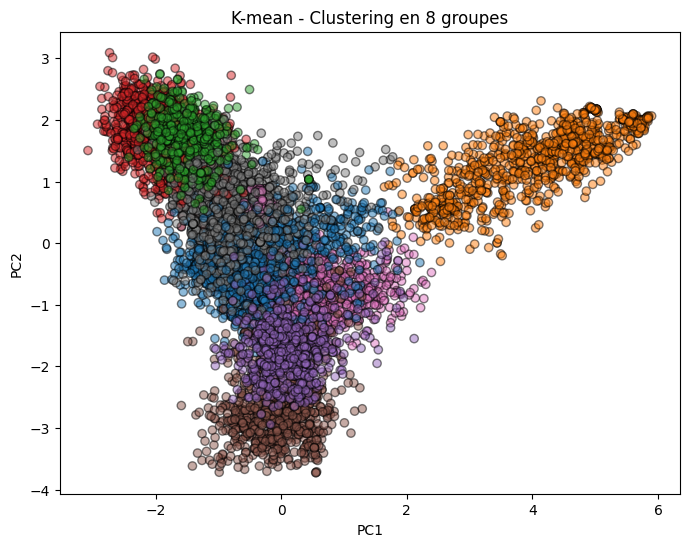

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array([palette[i] for i in kmeans_affectations]), alpha=0.5, edgecolor="black")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"K-mean - Clustering en {K} groupes")
plt.show()
plt.close()

In [ ]:
cah = sklearn.cluster.AgglomerativeClustering(n_clusters=K, linkage="ward")
cah_affectations = cah.fit_predict(X_pca[:, :D])
cah_compositions = my_scripts.composition_clusters(labels, cah_affectations, Y)

my_scripts.plot_composition("cah", labels, cah_compositions)

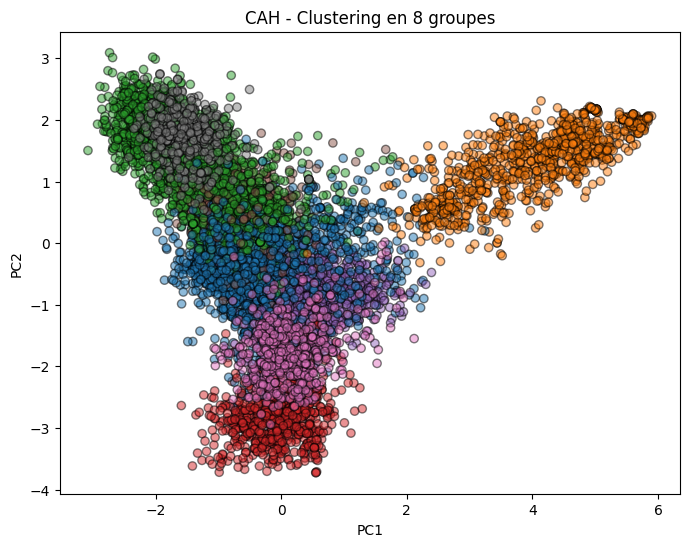

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array([palette[i] for i in cah_affectations]), alpha=0.5, edgecolor="black")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"CAH - Clustering en {K} groupes")
plt.show()
plt.close()

In [ ]:
gmm = sklearn.mixture.GaussianMixture(n_components=K, random_state=SEED)
gmm_affectations = gmm.fit_predict(X_pca[:, :D])
gmm_compositions = my_scripts.composition_clusters(labels, gmm_affectations, Y)

my_scripts.plot_composition("gmm", labels, gmm_compositions)

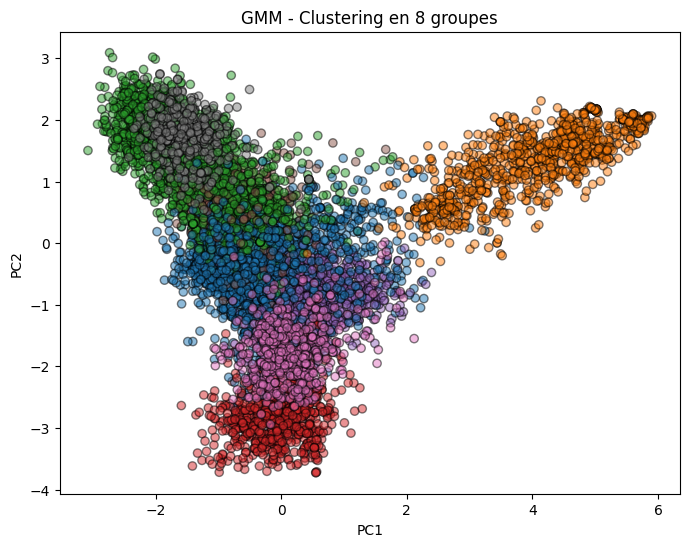

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array([palette[i] for i in cah_affectations]), alpha=0.5, edgecolor="black")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"GMM - Clustering en {K} groupes")
plt.show()
plt.close()

In [ ]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_pca[:, :D], Y, test_size=0.2, random_state=SEED,)

reglog = sklearn.linear_model.LogisticRegression(solver="lbfgs", max_iter=1000, random_state=SEED, penalty="l2", C=0.004)
reglog.fit(X_train, Y_train)

Y_pred = reglog.predict(X_train)

print("--------------------------------------------------------")
print("------------------------TRAIN---------------------------\n")
print(f"Accuracy: {round(sklearn.metrics.accuracy_score(Y_train, Y_pred)*100, 2)}%")
print(sklearn.metrics.classification_report(Y_train, Y_pred))
print("--------------------------------------------------------")

Y_pred = reglog.predict(X_test)

print("------------------------TEST----------------------------\n")
print(f"Accuracy: {round(sklearn.metrics.accuracy_score(Y_test, Y_pred)*100, 2)}%")
print(sklearn.metrics.classification_report(Y_test, Y_pred))
print("--------------------------------------------------------")


--------------------------------------------------------
------------------------TRAIN---------------------------

Accuracy: 92.88%
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       812
           1       0.99      0.96      0.97       815
           2       0.96      0.98      0.97       800
           3       0.85      0.79      0.82       790
           4       0.83      0.85      0.84       792
           5       0.99      0.94      0.96       804
           6       0.99      0.99      0.99       801
           7       0.90      0.96      0.93       786

    accuracy                           0.93      6400
   macro avg       0.93      0.93      0.93      6400
weighted avg       0.93      0.93      0.93      6400

--------------------------------------------------------
------------------------TEST----------------------------

Accuracy: 91.56%
              precision    recall  f1-score   support

           0       0.90      0

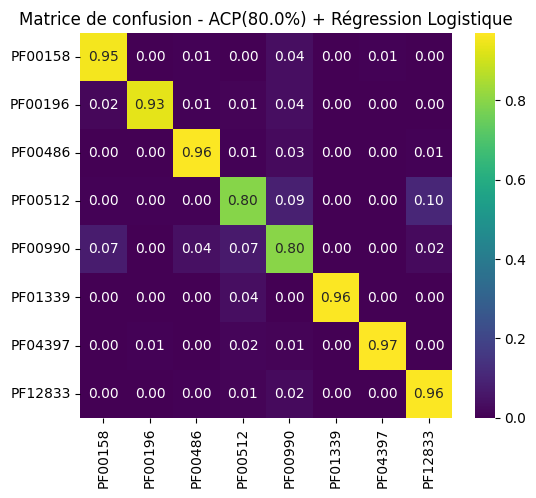

In [ ]:
plt.figure(figsize=(6, 5))
matrice_confusion = sklearn.metrics.confusion_matrix(Y_test, Y_pred)
matrice_confusion = matrice_confusion.astype("float") / matrice_confusion.sum(axis=1, keepdims=True)
sns.heatmap(matrice_confusion, annot=True, cmap="viridis", fmt=".2f", xticklabels=labels.values(), yticklabels=labels.values())
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title(f"Matrice de confusion - ACP({seuil_acp*100}%) + Régression Logistique")
plt.savefig(f"visualization/matrice_confusion_reglog_acp_{int(seuil_acp*100)}.svg")
plt.show()
plt.close()

In [ ]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=SEED,)

reglog = sklearn.linear_model.LogisticRegression(solver="lbfgs", max_iter=1000, random_state=SEED, penalty="l2", C=0.004)
reglog.fit(X_train, Y_train)

Y_pred = reglog.predict(X_train)

print("--------------------------------------------------------")
print("------------------------TRAIN---------------------------\n")
print(f"Accuracy: {round(sklearn.metrics.accuracy_score(Y_train, Y_pred)*100, 2)}%")
print(sklearn.metrics.classification_report(Y_train, Y_pred))
print("--------------------------------------------------------")

Y_pred = reglog.predict(X_test)

print("------------------------TEST----------------------------\n")
print(f"Accuracy: {round(sklearn.metrics.accuracy_score(Y_test, Y_pred)*100, 2)}%")
print(sklearn.metrics.classification_report(Y_test, Y_pred))
print("--------------------------------------------------------")


--------------------------------------------------------
------------------------TRAIN---------------------------

Accuracy: 93.45%
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       812
           1       0.99      0.96      0.98       815
           2       0.96      0.98      0.97       800
           3       0.86      0.80      0.83       790
           4       0.85      0.87      0.86       792
           5       0.99      0.94      0.97       804
           6       0.99      0.99      0.99       801
           7       0.91      0.96      0.94       786

    accuracy                           0.93      6400
   macro avg       0.93      0.93      0.93      6400
weighted avg       0.94      0.93      0.93      6400

--------------------------------------------------------
------------------------TEST----------------------------

Accuracy: 91.88%
              precision    recall  f1-score   support

           0       0.92      0

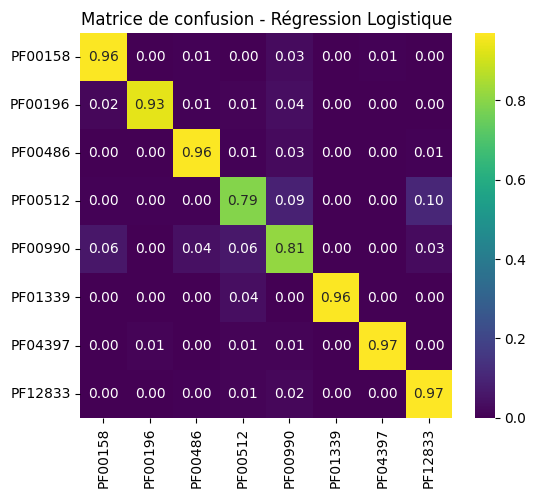

In [ ]:
plt.figure(figsize=(6, 5))
matrice_confusion = sklearn.metrics.confusion_matrix(Y_test, Y_pred)
matrice_confusion = matrice_confusion.astype("float") / matrice_confusion.sum(axis=1, keepdims=True)
sns.heatmap(matrice_confusion, annot=True, cmap="viridis", fmt=".2f", xticklabels=labels.values(), yticklabels=labels.values())
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title(f"Matrice de confusion - Régression Logistique")
plt.savefig(f"visualization/matrice_confusion_reglog.svg")
plt.show()
plt.close()